In [1]:
from utilidades import *
import warnings
warnings.filterwarnings('ignore')

# Affinity Propagation

O algoritmo de clusterização Affinity Propagation é uma técnica de aprendizado não supervisionado que não requer a especificação prévia do número de clusters K. Ele é capaz de encontrar automaticamente o número de clusters e determinar quais pontos devem ser os exemplares (representantes) de cada cluster.

O Affinity Propagation é especialmente útil quando os dados têm uma estrutura complexa e não se enquadram facilmente em clusters convexos ou bem definidos. Ele é amplamente utilizado em várias áreas, como análise de redes sociais, reconhecimento de padrões, análise de imagens e bioinformática.

Descrição passo a passo de como o algoritmo Affinity Propagation funciona:

**1. Similaridade entre pontos**: O primeiro passo do algoritmo é calcular uma matriz de similaridade entre todos os pontos do conjunto de dados. Essa matriz de similaridade representa o quanto cada ponto é similar a todos os outros pontos do conjunto. A similaridade pode ser medida usando uma métrica como a distância euclidiana, por exemplo.

**2. Escolha dos exemplares iniciais (Responsabilidade e Disponibilidade)**: Cada ponto inicialmente considera todos os outros pontos como seus possíveis exemplares e atualiza duas matrizes, a matriz de Responsabilidade (R) e a matriz de Disponibilidade (A). A matriz de Responsabilidade (R) contém informações sobre o quanto cada ponto acredita que outros pontos devem ser seus exemplares, com base na similaridade. A matriz de Disponibilidade (A) contém informações sobre o quanto cada ponto está disponível para ser um exemplar, com base na similaridade dos pontos que o consideram um exemplar.

**3. Atualização das matrizes R e A**: O algoritmo atualiza iterativamente as matrizes R e A até que a convergência seja alcançada. Durante cada iteração, a matriz de Responsabilidade é atualizada para refletir a similaridade entre pontos e seus exemplares. A matriz de Disponibilidade é atualizada para refletir a disponibilidade de pontos para serem exemplares, considerando a responsabilidade dos outros pontos.

**4. Determinação dos clusters**: Uma vez que as matrizes R e A convergirem, os exemplares finais são determinados. Os pontos que têm alta disponibilidade são escolhidos como exemplares e são os representantes de seus clusters. Os pontos que têm alta responsabilidade em relação a esses exemplares também são atribuídos a esses clusters.
Resultado: Os pontos são agrupados nos clusters definidos pelos exemplares. Cada cluster representa um grupo de pontos que compartilham uma forte afinidade entre si.


Quando você não tem uma ideia clara sobre quantos clusters existem nos seus dados, este algoritmo pode ser vantajoso, já que ele não requer uma predefinição do número de clusters. O Affinity Propagation, além de poder capturar relações complexas entre os dados, especialmente quando os clusters têm formas não-lineares ou diferentes tamanhos, também é mais robusto a outliers em comparação com alguns outros algoritmos de clusterização, devido à sua estrutura de cálculo de afinidade. Porém, o Affinity Propagation pode ser computacionalmente caro, especialmente para conjuntos de dados grandes. A matriz de similaridade e a matriz de responsabilidades podem se tornar grandes, resultando em um consumo considerável de memória e tempo de processamento. Além disso, uma escolha inadequada dos parâmetros do algoritmo pode levar a resultados subótimos ou até mesmo à convergência falha.


# Data

In [2]:
X_iris, y_iris, iris_target_names = get_iris_data()
X_wine, y_wine, wine_target_names = get_wine_data()
X_syn_ctrl, y_syn_ctrl, syn_ctrl_target_names = get_synthetic_control_data()

# Normalizando os dados
from scipy.stats import zscore
X_syn_ctrl = zscore(X_syn_ctrl)
X_iris = zscore(X_iris)
X_wine = zscore(X_wine)

<h1>Redução de dimensionalidade</h1>

In [3]:
from sklearn.manifold import TSNE

X_syn_ctrl_2d = TSNE().fit_transform(X_syn_ctrl)
X_wine_2d = TSNE().fit_transform(X_wine)
X_iris_2d = TSNE().fit_transform(X_iris)

# Clusterização

In [4]:
from sklearn.cluster import AffinityPropagation

ap_labels_syn_ctrl = AffinityPropagation().fit_predict(X_syn_ctrl)
ap_labels_wine = AffinityPropagation().fit_predict(X_wine)
ap_labels_iris = AffinityPropagation().fit_predict(X_iris)

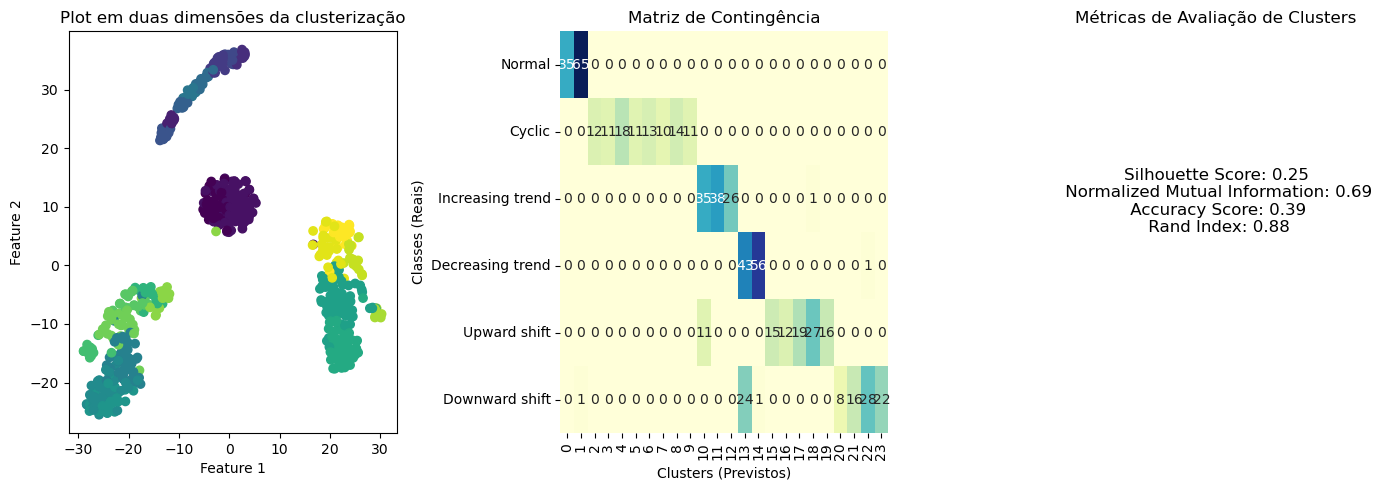

In [5]:
# Synthetic Control

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, ap_labels_syn_ctrl, syn_ctrl_target_names)

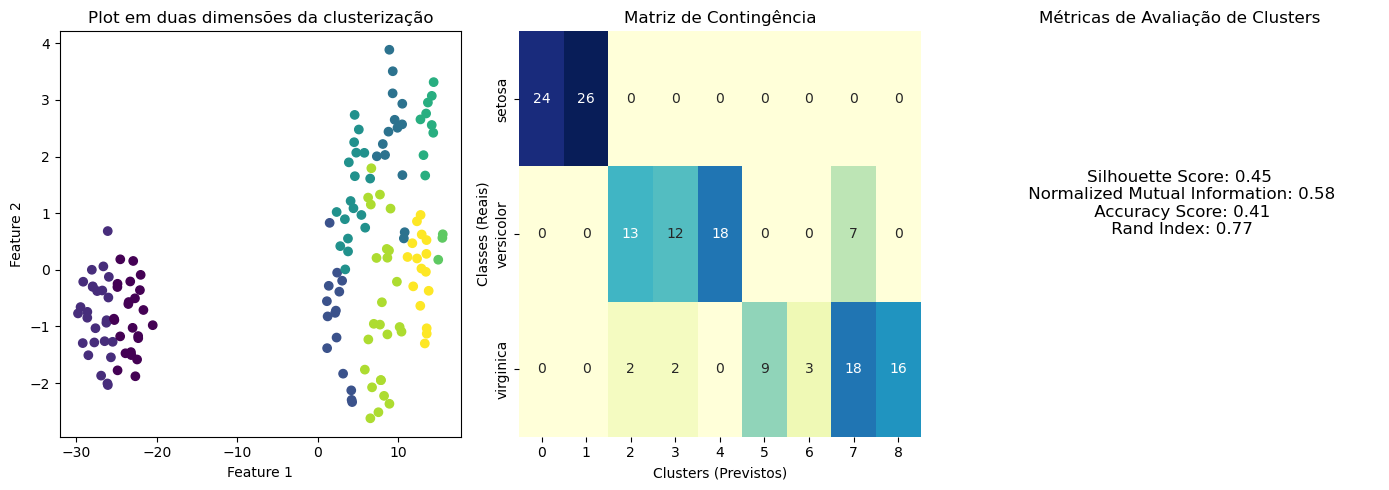

In [6]:
# Iris

plot_cluster_evaluation(X_iris_2d, y_iris, ap_labels_iris, iris_target_names)

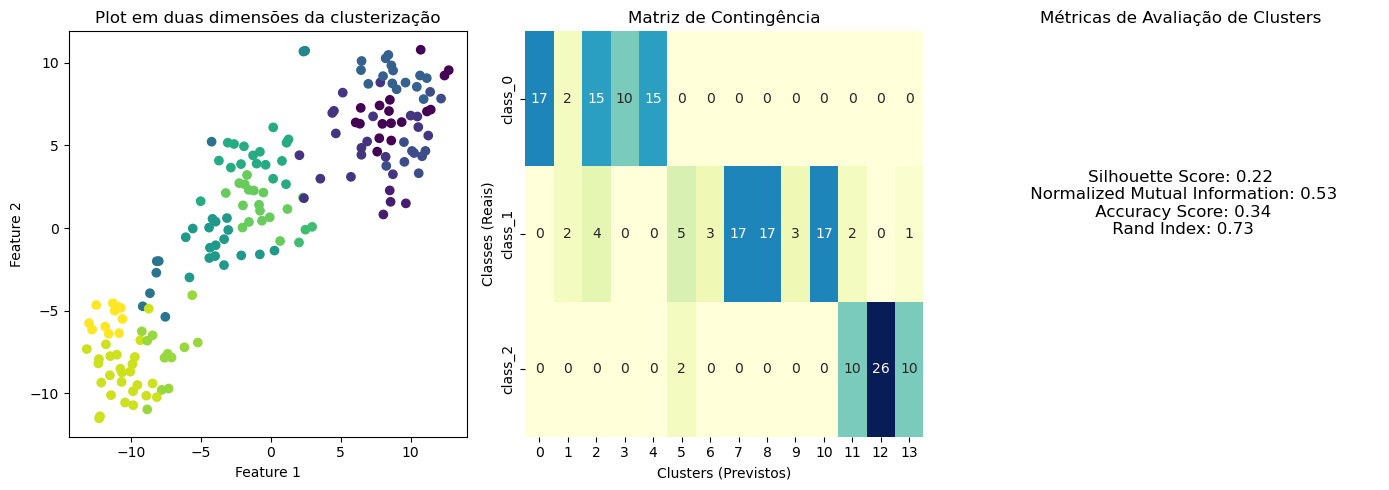

In [7]:
# Wine

plot_cluster_evaluation(X_wine_2d, y_wine, ap_labels_wine, wine_target_names)